In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange, array

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
housing = pd.read_csv('data/houseprice_clean.csv')
housing.shape

(2580, 80)

In [3]:
price = housing['SalePrice']
features = housing.drop(["SalePrice"], axis=1)
log_price = np.log(housing.SalePrice)

## Scale Features

In [7]:
num_features = features.select_dtypes(include=['int64','float64'])
cat_features = features.select_dtypes(include=['object'])

In [8]:
# Scaling

# do I train the scaler on the train set only, or can I do on the whole set?
# is it important to scale train/test separately? (see scratch for example)

scaler = StandardScaler()
num_feat_scaled = pd.DataFrame(scaler.fit_transform(num_features), columns = num_features.columns)
features_scaled = pd.concat([num_feat_scaled, cat_features], axis = 1)
features_scaled = pd.get_dummies(features_scaled, drop_first=True)

In [47]:
features_scaled.shape

(2580, 268)

In [48]:
# confirm only numerical features are standardized
features_scaled.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,...,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.289598,-0.647100,-0.298749,-0.274468,-0.033733,0.339988,-1.053847,-1.647539,-0.562750,-0.480304,-0.305221,0.186062,-0.430387,-0.768784,-0.794405,-0.095609,1.089555,-0.25377,-1.009265,-0.757892,-1.033650,-0.199051,-1.555298,0.610254,-1.397394,0.341856,-0.327115,-0.743408,-0.697756,-0.362184,-0.099302,2.636678,-0.054791,-0.097731,-1.180008,1.647483,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-0.894555,1.456008,-0.663099,-0.724294,-0.765088,-0.551444,0.460593,0.012109,0.286195,0.251192,1.948743,-1.022874,0.030354,-0.255331,-0.794405,-0.095609,1.089555,-0.25377,0.823179,-0.757892,-1.033650,-0.199051,-0.903785,-0.931817,0.333582,-1.012439,-0.968399,-0.743408,0.892001,-0.362184,-0.

## Ridge

In [61]:
X = features_scaled
y = price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [50]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k=235)
 
    # learn relationship from training data
    fs.fit(X_train, y_train)
 
    # transform train and test data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [51]:
X_train_fs.shape

(1806, 235)

In [58]:
selected_features = list(X.columns[fs.get_support()])
selected_features

['GrLivArea',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_I (all)',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_None',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_NoSewr',
 'LotConfig_CulDSac',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor'

In [60]:
cv = KFold(n_splits=3, shuffle = True, random_state = 0)

ridge = Ridge(alpha = 10)
ridge.fit(X_train_fs, y_train)

scores = cross_val_score(ridge, X_test_fs, y_test, cv=cv, scoring="r2")

print(f"Average R-squared score: {scores.mean()}")
scores

# why is this worse than the pipeline?

Average R-squared score: 0.9095954986559672


array([0.90253988, 0.93197719, 0.89426942])

In [41]:
ridge = Ridge()

pipeline = Pipeline([
     ('selector',SelectKBest(f_regression)),
     ('model',Ridge())])

params = {
    'selector__k': arange(100, 268, 2),
    'model__alpha': arange(1, 100, 2)
}
# 92.2

params1 = {
    'selector__k': arange(200, 268, 5),
    'model__alpha': [.001, .01, .1, 1, 10, 100]
}
# 92.65
# alpha = 10, k = 235

params2 = {
    'selector__k': arange(150, 268, 5),
    'model__alpha': arange(1, 50, 2)
}
# 92.2

params3 = {
    'selector__k': arange(230, 240, 1),
    'model__alpha': arange(1, 15, 1)
}
# 92.5

params4 = {
    'selector__k': arange(230, 240, 1),
    'model__alpha': arange(1, 100, 2)
}
# 92.4

params5 = {
    'selector__k': arange(230, 240, 1),
    'model__alpha': arange(1, 10, 1)
}
# 92.5

params6 = {
    'selector__k': arange(231, 233, 1),
    'model__alpha': arange(2, 5, .1)
}
# 92.4

cv = KFold(n_splits=3, shuffle = True, random_state = 0)
gs = GridSearchCV(pipeline, params1, scoring='r2', cv=cv)
gs.fit(X_train, y_train)

print("The best parameters are: ", gs.best_params_)
print("R^2 of the final model: ", gs.score(X_test, y_test))

The best parameters are:  {'model__alpha': 10, 'selector__k': 235}
R^2 of the final model:  0.9265728597459603


In [62]:
cols = X.columns[gs.best_estimator_.named_steps['selector'].get_support()]
coefs = gs.best_estimator_.named_steps['model'].coef_
coefs = pd.DataFrame(coefs, index=cols)
coefs.columns = ['coef']
coefs.sort_values(by = 'coef', ascending = False)

,coef
Neighborhood_StoneBr,27428.677214
RoofMatl_WdShngl,25077.632083
Neighborhood_NoRidge,20920.845424
Neighborhood_NridgHt,17604.932539
Condition2_PosA,17323.069964
...,...
BsmtQual_Gd,-15902.443078
KitchenQual_TA,-17328.770343
ExterQual_Gd,-19449.500819
ExterQual_TA,-21328.006231


In [65]:
# none are 0
coefs[coefs['coef'] == 0]

,coef


In [102]:
alphas_ridge = arange(0, 15)
coefs_ridge = []
scores_ridge = []
for alpha in alphas_ridge:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    scores_ridge.append(ridge.score(X_test, y_test))
coefs_ridge = pd.DataFrame(coefs_ridge, index=alphas, columns=X_train.columns)
coefs_ridge.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,...,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.530051e+18,-2311.092457,-6019.097021,7494.135443,9505.650847,6898.376653,11601.165588,-118.616275,6029.419579,1.218573e+18,4.949702e+17,1.206961e+18,-1.189143e+18,1.177195e+18,1.327847e+18,1.390357e+17,3245.202289,203.209190,-254.187514,-582.747381,-3860.783589,-2098.501442,914.451348,6748.479866,-1485.772667,4152.541270,2525.899953,1647.964163,-504.782085,1700.989123,-100.167270,2754.261625,-8046.907710,481.488795,-321.412006,-375.693495,2.690764e+17,2.690764e+17,-1.132231e+18,2.690764e+17,2.690764e+17,2.690764e+17,13455.685382,542.354213,-3762.366455,275.793943,-4164.976772,617.999864,5032.566219,-3324.633062,6460.059362,1.401307e+18,1587.295395,-5158.923533,-13225.200367,-1422.215016,5611.311196,-26381.802258,2657.020769,5840.076045,-904.580531,-8388.024388,-9017.198623,4412.176827,-19856.552722,-8804.603629,5382.707798,70168.180039,-9118.777033,9.618760e+17,2654.075394,-16034.527045,-17154.822732,18223.390350,-14608.886891,22374.365664,13940.068128,-16391.

Text(0, 0.5, 'slope values')

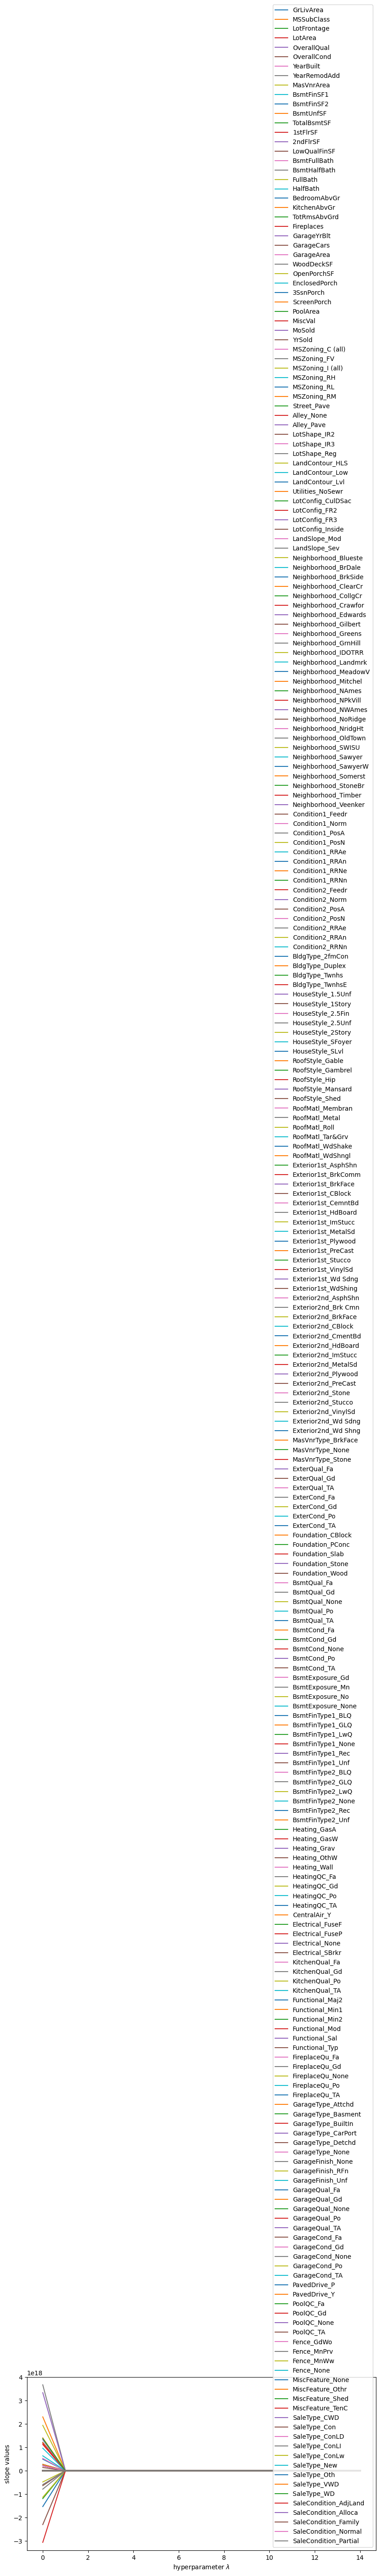

In [103]:
# something is wrong here
# why is the grid search returning 11 as the optimum alpha?
# why are all coefficients going to 0?
# why is R^2 increasing instead of decreasing?

plt.rcParams['figure.figsize'] = (10,5)
for name in coefs_ridge.columns:
    plt.plot(coefs_ridge.index, coefs_ridge[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

Text(0, 0.5, '$R^2$')

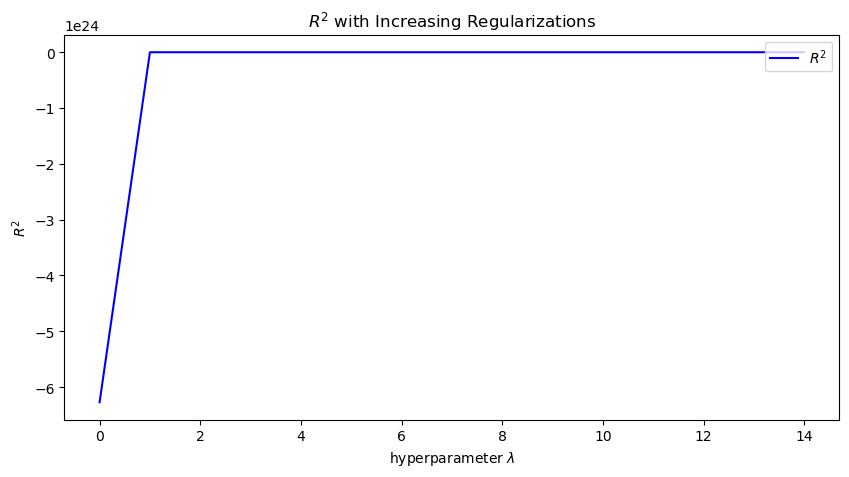

In [104]:
plt.plot(alphas_ridge, scores_ridge, c="b", label=r"$R^2$")
plt.legend(loc=1)
plt.title(r"$R^2$ with Increasing Regularizations")
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"$R^2$")